# Direct Methods for the solution of Linear Systems

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [12]:
def solveSystem(A):
    x_true = np.ones((A.shape[0],))

    b = A @ x_true

    x_sol = np.linalg.solve(A, b)
    error_abs = np.linalg.norm(x_true - x_sol, 2)
    error_rel = error_abs / np.linalg.norm(x_true, 2)
    
    return error_rel

In [86]:
def evaluate(matrixes):
    errors = []
    conds_2 = []
    conds_inf = []


    for A in matrixes:
        norm_2 = np.linalg.cond(A, 2)
        norm_inf = np.linalg.cond(A, np.inf)
        error_rel = solveSystem(A)

        print(f"{A.shape}".ljust(12) + 
              f"2-norm K(A): {norm_2}".ljust(40) + 
              f"| inf-norm K(A): {norm_inf}".ljust(40) + 
              f"| rel error: {error_rel}")

        errors.append(error_rel)
        conds_2.append(norm_2)
        conds_inf.append(norm_inf)


    n_values = [A.shape[0] for A in matrixes]

    plt.title("Relative error")
    plt.plot(n_values, errors)
    plt.show()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle("Condition number")
    ax1.title.set_text("Linear scale")
    ax1.plot(n_values, conds_2, label="2-norm")
    ax1.plot(n_values, conds_inf, label="inf-norm")
    ax2.title.set_text("Log scale")
    ax2.plot(n_values, conds_2, label="2-norm")
    ax2.plot(n_values, conds_inf, label="inf-norm")
    ax2.set_yscale("log")
    plt.show()

(10, 10)    2-norm K(A): 85.67717103399416          | inf-norm K(A): 189.06670731343982     | rel error: 7.834745636426876e-16
(20, 20)    2-norm K(A): 153.06025715682            | inf-norm K(A): 314.673922279666       | rel error: 3.384541794752161e-15
(30, 30)    2-norm K(A): 405.9879093510713          | inf-norm K(A): 949.6272604127292      | rel error: 1.4214887375103222e-14
(40, 40)    2-norm K(A): 2444.4080805994968         | inf-norm K(A): 5312.124221070796      | rel error: 4.121679615575539e-15
(50, 50)    2-norm K(A): 1230.2152184133683         | inf-norm K(A): 3237.5188001893666     | rel error: 2.8111579230074324e-14
(60, 60)    2-norm K(A): 4295.321039784077          | inf-norm K(A): 9226.20804741146       | rel error: 5.538264219585184e-14
(70, 70)    2-norm K(A): 941.0085704711355          | inf-norm K(A): 2565.4503141555815     | rel error: 8.116709859446384e-15
(80, 80)    2-norm K(A): 1286.1301844428283         | inf-norm K(A): 3229.7031145598075     | rel error: 1.80

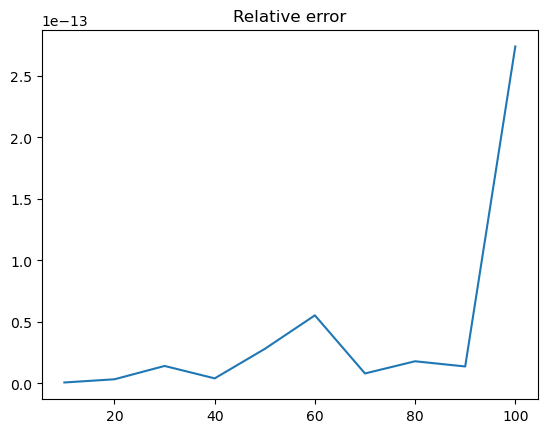

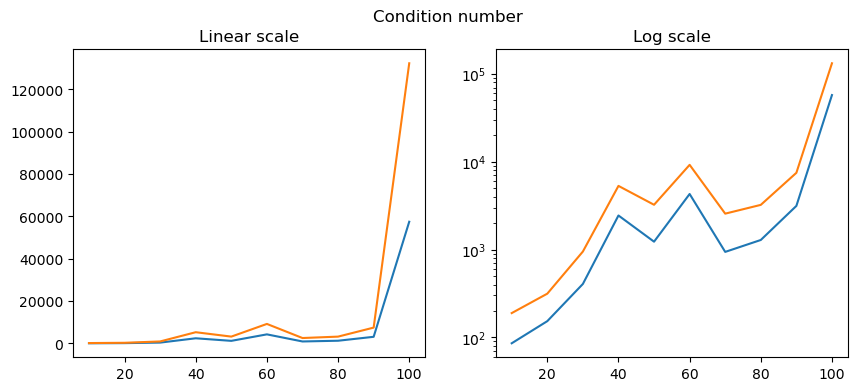

In [87]:
evaluate([np.random.rand(n, n) for n in range(10, 101, 10)])

(5, 5)      2-norm K(A): 2592.8860553341588         | inf-norm K(A): 4546.666666666661      | rel error: 5.704429186199679e-16
(10, 10)    2-norm K(A): 90077754660.97594          | inf-norm K(A): 145315890803.6228      | rel error: 2.454876881812924e-09
(15, 15)    2-norm K(A): 6.988244625025139e+19      | inf-norm K(A): 1.2135881596511494e+20 | rel error: 0.32175467942669955
(20, 20)    2-norm K(A): 2.4995848094723235e+22     | inf-norm K(A): 6.68031434691639e+22   | rel error: 3445.5918067702983
(25, 25)    2-norm K(A): 3.5471475932173776e+21     | inf-norm K(A): 1.1006214674639787e+22 | rel error: 8298.821541916532
(30, 30)    2-norm K(A): 1.7568310945240006e+21     | inf-norm K(A): 6.409961637844746e+21  | rel error: 1735.6467264063751


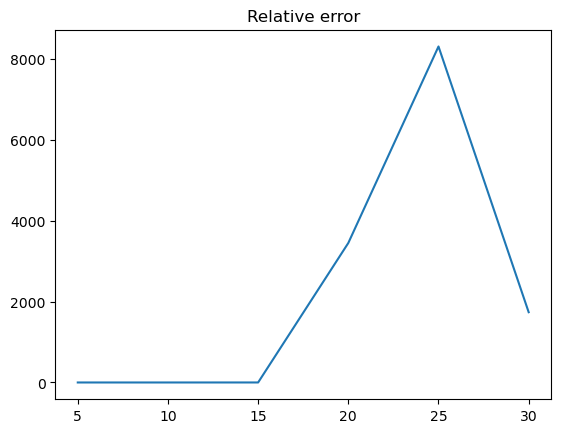

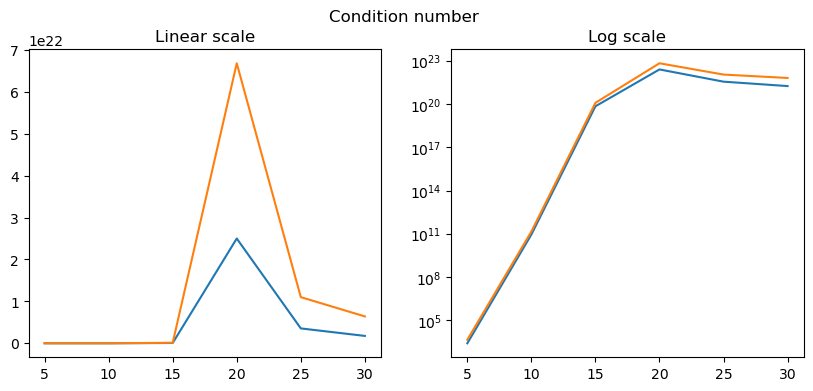

In [88]:
evaluate([np.vander(range(n)) for n in range(5, 31, 5)])

(4, 4)      2-norm K(A): 15513.738738928138         | inf-norm K(A): 28374.999999997388     | rel error: 3.861787750251888e-13
(5, 5)      2-norm K(A): 476607.25024172297         | inf-norm K(A): 943655.9999999335      | rel error: 3.782942176591251e-12
(6, 6)      2-norm K(A): 14951058.64080515          | inf-norm K(A): 29070279.002940644     | rel error: 4.764069035605587e-10
(7, 7)      2-norm K(A): 475367356.91592133         | inf-norm K(A): 985194889.719848       | rel error: 3.6914292198943105e-09
(8, 8)      2-norm K(A): 15257575252.823627         | inf-norm K(A): 33872790819.49471      | rel error: 2.685641344606372e-07
(9, 9)      2-norm K(A): 493154382668.9694          | inf-norm K(A): 1099650991701.052      | rel error: 1.8137285075715115e-05
(10, 10)    2-norm K(A): 16024573626355.164         | inf-norm K(A): 35353724553756.43      | rel error: 0.0002596222657991884
(11, 11)    2-norm K(A): 522741900236946.1          | inf-norm K(A): 1230369938308719.0     | rel error: 6.15

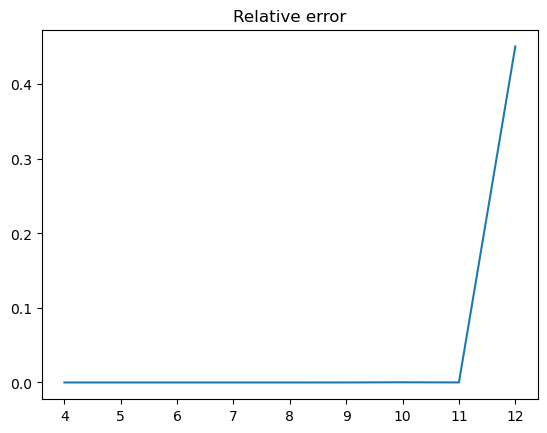

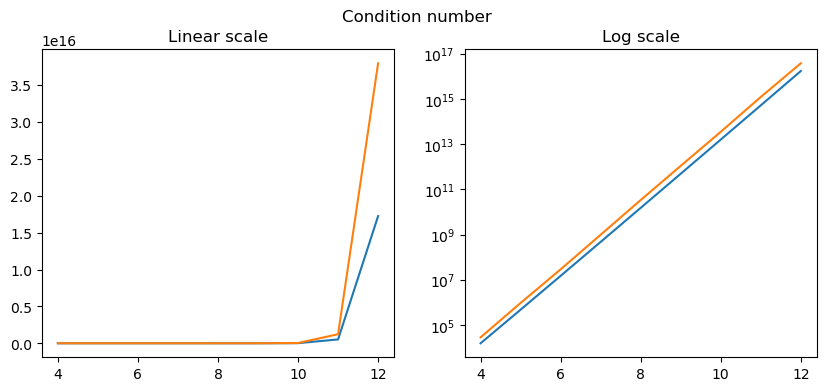

In [89]:
evaluate([scipy.linalg.hilbert(n) for n in range(4, 13, 1)])